<a href="https://colab.research.google.com/github/Sachinkumar-jpg/machine-learning/blob/main/fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('/content/train.csv')


In [51]:
# Step 1: Identify features with missing values
missing_values = data.isnull().sum()

# Step 2: Decide on an appropriate strategy for each feature
for feature, missing_count in missing_values.iteritems():
    if missing_count > 0:
        print(f"Feature '{feature}' has {missing_count} missing values.")

        # Decide on a strategy:
        # Example 1: Impute missing values with the mean
        if data[feature].dtype == 'float64':
            mean_value = data[feature].mean()
            data[feature].fillna(mean_value, inplace=True)
            print(f"Strategy: Imputed missing values with mean value {mean_value}")

        # Example 2: Delete rows with missing values
        # data.dropna(subset=[feature], inplace=True)
        # print("Strategy: Deleted rows with missing values")

        # You can define other strategies as needed

# Optionally, save the modified dataset to a new file
# data.to_csv('new_dataset.csv', index=False)

<ipython-input-51-28954ceccef7>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature, missing_count in missing_values.iteritems():


In [45]:
column_to_remove = 'Id'  # Replace 'column_name' with the actual column name

# Remove the specified column from the dataset
data = data.drop(columns=[column_to_remove])

# Optionally, save the modified dataset to a new file
data.to_csv('dataset_without_column.csv', index=False)

In [46]:
label_encoder = LabelEncoder()

# Iterate through columns and encode non-numeric values
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

# Optionally, save the encoded dataset to a new file
data.to_csv('encoded_dataset.csv', index=False)

In [47]:
data_filled = data.fillna(data.mean())

# Optionally, save the dataset with missing values filled to a new file
data_filled.to_csv('filled_dataset.csv', index=False)

In [52]:
z_score_threshold = 3.0

# Calculate the Z-scores for each column
z_scores = np.abs((data - data.mean()) / data.std())

# Find rows with any Z-score exceeding the threshold
outlier_rows = z_scores[(z_scores > z_score_threshold).any(axis=1)].index

# Remove outliers from the dataset
data_no_outliers = data.drop(outlier_rows)

# Optionally, save the dataset without outliers to a new file
data_no_outliers.to_csv('data_no_outliers.csv', index=False)

to detect the catagorical column

In [53]:
categorical_columns = data.select_dtypes(include=['object']).columns

# Print or use the list of categorical column names
print("Categorical Columns:")
for column in categorical_columns:
    print(column)

Categorical Columns:


In [54]:
# Select the numerical columns for normalization or standardization
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Apply Min-Max normalization to the numerical columns
scaler_minmax = MinMaxScaler()
data[numerical_columns] = scaler_minmax.fit_transform(data[numerical_columns])

# Optionally, save the dataset with Min-Max normalized values to a new file
# data.to_csv('minmax_normalized_dataset.csv', index=False)

# Apply Z-score standardization to the numerical columns
scaler_standard = StandardScaler()
data[numerical_columns] = scaler_standard.fit_transform(data[numerical_columns])

# Optionally, save the dataset with Z-score standardized values to a new file
data.to_csv('standardized_dataset.csv', index=False)

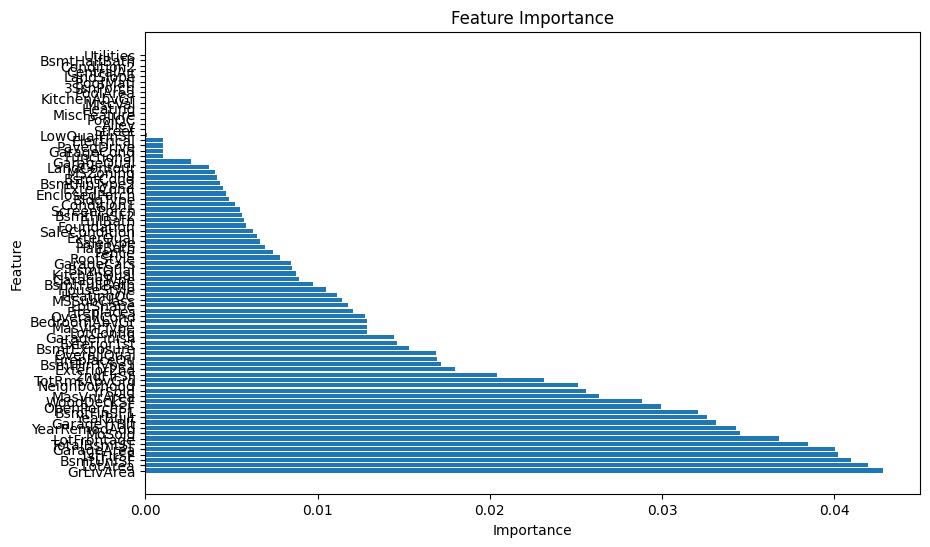

In [101]:
data = pd.read_csv('/content/data_no_outliers.csv')
# Split the dataset into features (X) and the target variable (y)

X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# Create a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the data
model.fit(X, y)

# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame to associate feature names with their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

split data set

In [69]:
data = pd.read_csv('/content/standardized_dataset.csv')
X = data.drop(columns=['SalePrice'])  # Replace 'target_column' with the actual target column name
y = data['SalePrice']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_valid)

# Calculate and print the model's performance metrics
mse = mean_squared_error(y_valid, y_pred)
mae = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error: 0.19
Mean Absolute Error: 0.44
R-squared (R2): 0.84


decision tree model

In [71]:
model = DecisionTreeRegressor(max_depth=5)  # You can adjust the max_depth parameter

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_valid)

# Calculate and print the model's performance metrics
mse = mean_squared_error(y_valid, y_pred)
mae = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error: 0.24
Mean Absolute Error: 0.49
R-squared (R2): 0.81


Random Forest, Gradient Boosting

In [72]:
# Random Forest Regression
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
rf_y_pred = random_forest_model.predict(X_valid)

# Gradient Boosting Regression
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_model.fit(X_train, y_train)
gb_y_pred = gradient_boosting_model.predict(X_valid)

# Evaluate Random Forest Regression
rf_mse = mean_squared_error(y_valid, rf_y_pred)
rf_mae = np.sqrt(rf_mse)
rf_r2 = r2_score(y_valid, rf_y_pred)

# Evaluate Gradient Boosting Regression
gb_mse = mean_squared_error(y_valid, gb_y_pred)
gb_mae = np.sqrt(gb_mse)
gb_r2 = r2_score(y_valid, gb_y_pred)

print("Random Forest Regression:")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"Mean Absolute Error: {rf_mae:.2f}")
print(f"R-squared (R2): {rf_r2:.2f}")

print("\nGradient Boosting Regression:")
print(f"Mean Squared Error: {gb_mse:.2f}")
print(f"Mean Absolute Error: {gb_mae:.2f}")
print(f"R-squared (R2): {gb_r2:.2f}")

Random Forest Regression:
Mean Squared Error: 0.13
Mean Absolute Error: 0.36
R-squared (R2): 0.90

Gradient Boosting Regression:
Mean Squared Error: 0.13
Mean Absolute Error: 0.36
R-squared (R2): 0.89


neural network

Epoch 1/100
37/37 - 1s - loss: 0.7465 - val_loss: 0.3294 - 806ms/epoch - 22ms/step
Epoch 2/100
37/37 - 0s - loss: 0.2574 - val_loss: 0.2498 - 107ms/epoch - 3ms/step
Epoch 3/100
37/37 - 0s - loss: 0.1834 - val_loss: 0.2462 - 93ms/epoch - 3ms/step
Epoch 4/100
37/37 - 0s - loss: 0.1408 - val_loss: 0.2290 - 104ms/epoch - 3ms/step
Epoch 5/100
37/37 - 0s - loss: 0.1067 - val_loss: 0.2143 - 96ms/epoch - 3ms/step
Epoch 6/100
37/37 - 0s - loss: 0.0896 - val_loss: 0.2078 - 100ms/epoch - 3ms/step
Epoch 7/100
37/37 - 0s - loss: 0.0747 - val_loss: 0.2032 - 86ms/epoch - 2ms/step
Epoch 8/100
37/37 - 0s - loss: 0.0634 - val_loss: 0.2006 - 96ms/epoch - 3ms/step
Epoch 9/100
37/37 - 0s - loss: 0.0556 - val_loss: 0.2018 - 98ms/epoch - 3ms/step
Epoch 10/100
37/37 - 0s - loss: 0.0496 - val_loss: 0.1982 - 91ms/epoch - 2ms/step
Epoch 11/100
37/37 - 0s - loss: 0.0440 - val_loss: 0.1972 - 95ms/epoch - 3ms/step
Epoch 12/100
37/37 - 0s - loss: 0.0396 - val_loss: 0.1939 - 99ms/epoch - 3ms/step
Epoch 13/100
37/37 -

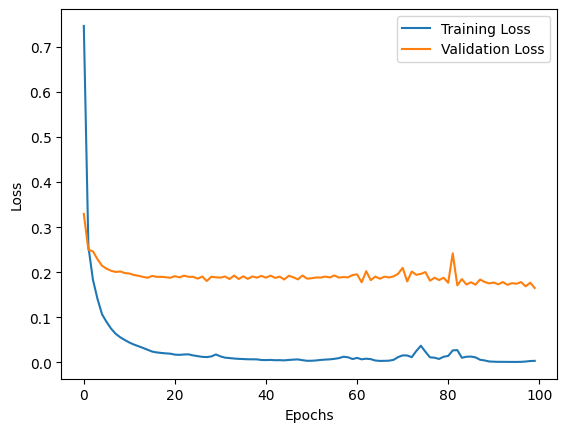

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# Create a simple neural network using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid), verbose=2)

# Make predictions on the validation data
y_pred = model.predict(X_valid)

# Calculate and print the model's performance metrics
mse = mean_squared_error(y_valid, y_pred)
mae = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize the loss over training epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [102]:
# Split the dataset into features (X) and the target variable (y)
X = data.drop(columns=['SalePrice'])  # Replace 'target_column' with the actual target column name
y = data['SalePrice']

# Standardize the input features (optional but recommended)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Cross-validation and evaluation with MAE
for name, model in models.items():
    if name == 'Neural Network':
        # Create a simple neural network using Keras
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1)
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Convert to Numpy arrays
        X_np = np.array(X)
        y_np = np.array(y)

        # Cross-validation
        mae_scores = -cross_val_score(model, X_np, y_np, cv=5, scoring='neg_mean_squared_error')
        mae = np.sqrt(mae_scores.mean())
    else:
        mae_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        mae = np.sqrt(mae_scores.mean())

    print(f'{name}: Mean Absolute Error (MAE): {mae:.2f}')

Linear Regression: Mean Absolute Error (MAE): 38151153017463.95
Decision Tree: Mean Absolute Error (MAE): 30754.43
Random Forest: Mean Absolute Error (MAE): 20534.08
Gradient Boosting: Mean Absolute Error (MAE): 20505.02


random forest regression model train on full data set

In [89]:
from sklearn.metrics import mean_absolute_error

# Load your training dataset (replace 'training_data.csv' with the actual file path)
training_data = pd.read_csv('/content/standardized_dataset.csv')

# Load your testing dataset (replace 'testing_data.csv' with the actual file path)
testing_data = pd.read_csv('/content/testdataforpredfiction.csv')

# Split the training dataset into features (X_train) and the target variable (y_train)
X_train = training_data.drop(columns=['SalePrice'])  # Replace 'target_column' with the actual target column name
y_train = training_data['SalePrice']

# Split the testing dataset into features (X_test)
X_test = testing_data.drop(columns=['SalePrice'])  # Replace 'target_column' with the actual target column name

# Standardize the input features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training dataset
model.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = model.predict(X_test)

#print(y_pred)
testing_data['SalePrice'] = y_pred

# Save the modified dataset with the new column (optional)
training_data.to_csv('updated_datase1.csv', index=False)

# Calculate Mean Absolute Error (MAE) on the testing data
# Load the actual target values for testing data (if available)
#y_test = testing_data['SalePrice']  # Replace 'target_column' with the actual target column name

# Calculate MAE on the testing data
#mae = mean_absolute_error(y_test, y_pred)

#print(f'Mean Absolute Error (MAE) on Testing Data: {mae:.2f}')

In [93]:
# Load your dataset (replace 'standardized_data.csv' with the actual file path)
data = pd.read_csv('/content/updated_datase1.csv')

# Load the mean and standard deviation from the original data (if available)
# Replace 'original_data.csv' with the path to the original dataset
original_data = pd.read_csv('/content/data_no_outliers.csv')

# Create a StandardScaler instance with the inverse transformation
scaler = StandardScaler()

# Set the mean and standard deviation values from the original data
scaler.mean_ = original_data.mean().values
scaler.scale_ = original_data.std().values

# Destandardize or denormalize the entire dataset
data = scaler.inverse_transform(data)

# Save the destandardized data to a new CSV file
data = pd.DataFrame(data, columns=original_data.columns)  # Ensure columns are named correctly
data.to_csv('destandardized_data.csv', index=False)  # Replace with the desired output file name

In [96]:
# Load your dataset with label-encoded columns
data = pd.read_csv('/content/destandardized_data.csv')

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Iterate through columns and decode numeric values
for column in data.columns:
    if data[column].dtype == 'int64':  # Check if the column contains encoded values
        data[column] = label_encoder.fit(data[column]).inverse_transform(data[column])

# Save the decoded data to a new CSV file
data.to_csv('decoded_dataset.csv', index=False)  # Replace with your desired output file name